In [4]:
import pandas as pd
import numpy as np
import scipy.stats as sts
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
df = pd.read_csv('StudentPerformanceFactors.csv')
df.head()

,Hours_Studied,Attendance,Parental_Involvement,Access_to_Resources,Extracurricular_Activities,Sleep_Hours,Previous_Scores,Motivation_Level,Internet_Access,Tutoring_Sessions,Family_Income,Teacher_Quality,School_Type,Peer_Influence,Physical_Activity,Learning_Disabilities,Parental_Education_Level,Distance_from_Home,Gender,Exam_Score
0,23,84,Low,High,No,7,73,Low,Yes,0,Low,Medium,Public,Positive,3,No,High School,Near,Male,67
1,19,64,Low,Medium,No,8,59,Low,Yes,2,Medium,Medium,Public,Negative,4,No,College,Moderate,Female,61
2,24,98,Medium,Medium,Yes,7,91,Medium,Yes,2,Medium,Medium,Public,Neutral,4,No,Postgraduate,Near,Male,74
3,29,89,Low,Medium,Yes,8,98,Medium,Yes,1,Medium,Medium,Public,Negative,4,No,High School,Moderate,Male,71
4,19,92,Medium,Medium,Yes,6,65,Medium,Yes,3,Medium,High,Public,Neutral,4,No,College,Near,Female,70


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6607 entries, 0 to 6606
Data columns (total 20 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   Hours_Studied               6607 non-null   int64 
 1   Attendance                  6607 non-null   int64 
 2   Parental_Involvement        6607 non-null   object
 3   Access_to_Resources         6607 non-null   object
 4   Extracurricular_Activities  6607 non-null   object
 5   Sleep_Hours                 6607 non-null   int64 
 6   Previous_Scores             6607 non-null   int64 
 7   Motivation_Level            6607 non-null   object
 8   Internet_Access             6607 non-null   object
 9   Tutoring_Sessions           6607 non-null   int64 
 10  Family_Income               6607 non-null   object
 11  Teacher_Quality             6529 non-null   object
 12  School_Type                 6607 non-null   object
 13  Peer_Influence              6607 non-null   obje

In [7]:
#заполняю пропуски
df["Teacher_Quality"].fillna(df["Teacher_Quality"].mode()[0], inplace = True)
df["Distance_from_Home"].fillna(df["Distance_from_Home"].mode()[0], inplace = True)

C:\Users\boris\AppData\Local\Temp\ipykernel_9260\1817359104.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["Teacher_Quality"].fillna(df["Teacher_Quality"].mode()[0], inplace = True)
C:\Users\boris\AppData\Local\Temp\ipykernel_9260\1817359104.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always 

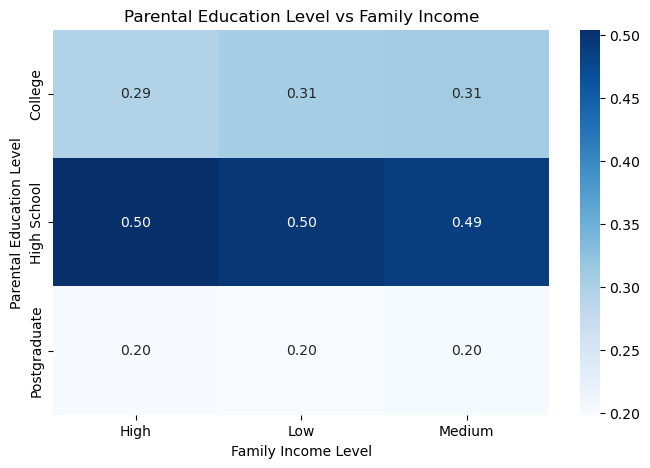

In [8]:
# Создаём pivot таблицу
pivot = pd.crosstab(df["Parental_Education_Level"], df["Family_Income"], normalize="columns")

# Визуализируем с помощью тепловой карты
plt.figure(figsize=(8, 5))
sns.heatmap(pivot, annot=True, cmap="Blues", fmt=".2f")
plt.title("Parental Education Level vs Family Income")
plt.xlabel("Family Income Level")
plt.ylabel("Parental Education Level")
plt.show()

In [9]:
df["Parental_Education_Level"].fillna(df["Parental_Education_Level"].mode()[0], inplace = True)

C:\Users\boris\AppData\Local\Temp\ipykernel_9260\1408212592.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["Parental_Education_Level"].fillna(df["Parental_Education_Level"].mode()[0], inplace = True)


In [10]:
#переменная динамики результата
df["Performance_Change"] = df["Exam_Score"] - df["Previous_Scores"]

In [12]:
#функция, переводящая категориальные переменные в числовые
def encode_categorical(df, columns):
    
    cdict = {'Low': 0, 'Medium': 1, 'High': 2, 'Yes': 1, 'No': 0, 
             'Positive': 1, 'Neutral': 0, 'Negative': -1, 'Public': 1,
             'Private': 0, 'Near': 1, 'Moderate': 0, 'Far': -1, 'High School': 1, 
             'College': 0, 'Postgraduate': 2}
    
    for col in columns:
        df[col] = df[col].map(cdict)
    
    return df

In [18]:
#массив с категориальными переменными
cat_cols = ["Parental_Involvement", "Access_to_Resources", "Motivation_Level", 
                    "Family_Income", "Teacher_Quality", "Extracurricular_Activities",
                    "Internet_Access", "School_Type", "Peer_Influence",
                    "Learning_Disabilities", "Distance_from_Home", "Parental_Education_Level"]

In [22]:
#применяю функцию к датасету
df = encode_categorical(df, cat_cols)
df.head()

,Hours_Studied,Attendance,Parental_Involvement,Access_to_Resources,Extracurricular_Activities,Sleep_Hours,Previous_Scores,Motivation_Level,Internet_Access,Tutoring_Sessions,...,Teacher_Quality,School_Type,Peer_Influence,Physical_Activity,Learning_Disabilities,Parental_Education_Level,Distance_from_Home,Gender,Exam_Score,Performance_Change
0,23,84,0,2,0,7,73,0,1,0,...,1,1,1,3,0,1,1,Male,67,-6
1,19,64,0,1,0,8,59,0,1,2,...,1,1,-1,4,0,0,0,Female,61,2
2,24,98,1,1,1,7,91,1,1,2,...,1,1,0,4,0,2,1,Male,74,-17
3,29,89,0,1,1,8,98,1,1,1,...,1,1,-1,4,0,1,0,Male,71,-27
4,19,92,1,1,1,6,65,1,1,3,...,2,1,0,4,0,0,1,Female,70,5


C:\Users\boris\AppData\Local\Temp\ipykernel_9260\2437126779.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="Family_Income", y="Tutoring_Sessions", data=df, palette="Set2")


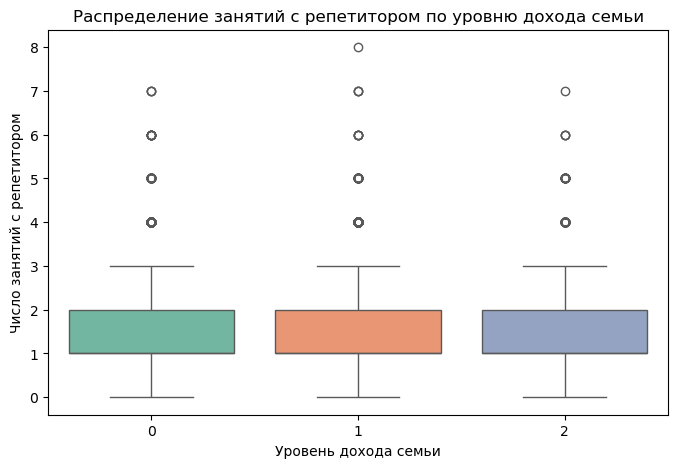

In [24]:
#ящик с усами для выявления возможной зависимости между переменными Family_Income и Tutoring_Sessions
plt.figure(figsize=(8, 5))
sns.boxplot(x="Family_Income", y="Tutoring_Sessions", data=df, palette="Set2")

plt.title("Распределение занятий с репетитором по уровню дохода семьи")
plt.xlabel("Уровень дохода семьи")
plt.ylabel("Число занятий с репетитором")

plt.show()

C:\Users\boris\AppData\Local\Temp\ipykernel_9260\3534482479.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x="Peer_Influence", y="Motivation_Level", data=df, palette="pastel")


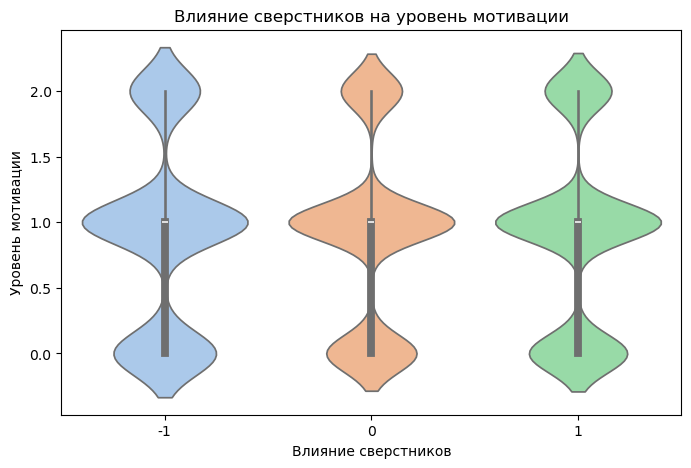

In [26]:
# violin plot для выявления возможной зависимости между переменными Peer_Influence и Motivation_Levelу
plt.figure(figsize=(8, 5))
sns.violinplot(x="Peer_Influence", y="Motivation_Level", data=df, palette="pastel")

plt.title("Влияние сверстников на уровень мотивации")
plt.xlabel("Влияние сверстников")
plt.ylabel("Уровень мотивации")

plt.show()

C:\Users\boris\AppData\Local\Temp\ipykernel_9260\3437555835.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Physical_Activity", y="Sleep_Hours", data=df, errorbar=None, palette="coolwarm")


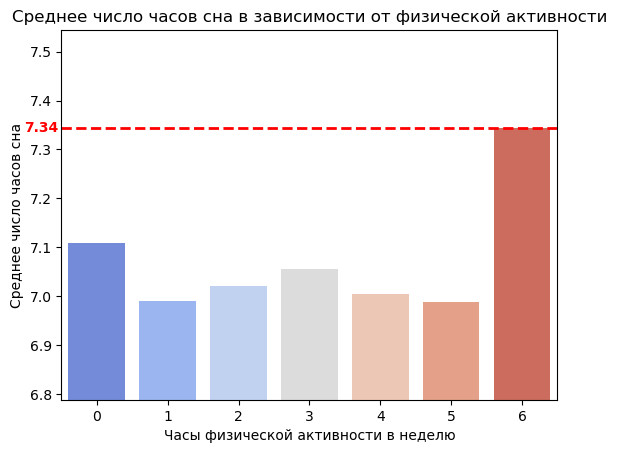

In [68]:
mean_values = df.groupby("Physical_Activity")["Sleep_Hours"].mean() #хочу выделить максималаьное значение среди средних
max_mean_value = mean_values.max()


sns.barplot(x="Physical_Activity", y="Sleep_Hours", data=df, errorbar=None, palette="coolwarm")

plt.ylim(min(mean_values) - 0.2, max_mean_value + 0.2)

plt.axhline(y=max_mean_value, color='red', linestyle='--', linewidth=2)
plt.text(x=-0.55, y=max_mean_value, s=f"{max_mean_value:.2f}", 
         color="red", fontsize=10, fontweight="bold", 
         verticalalignment='center', horizontalalignment='right')

plt.xlabel("Часы физической активности в неделю")
plt.ylabel("Среднее число часов сна")
plt.title("Среднее число часов сна в зависимости от физической активности")

plt.show()